Importing libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

Reading data

In [17]:
df=pd.read_excel(r"C:\Users\suhas\Downloads\DS - Assignment Part 1 data set.xlsx")

In [18]:
df.head(2)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2


Checking data for null values and also checking for types of features

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [20]:
df.isna().sum()/len(df)*100

Transaction date                            0.0
House Age                                   0.0
Distance from nearest Metro station (km)    0.0
Number of convenience stores                0.0
latitude                                    0.0
longitude                                   0.0
Number of bedrooms                          0.0
House size (sqft)                           0.0
House price of unit area                    0.0
dtype: float64

correlation plot for dataset. we will drop correlated features which have strong correlation with each other

<AxesSubplot:title={'center':'Correlation Plot'}>

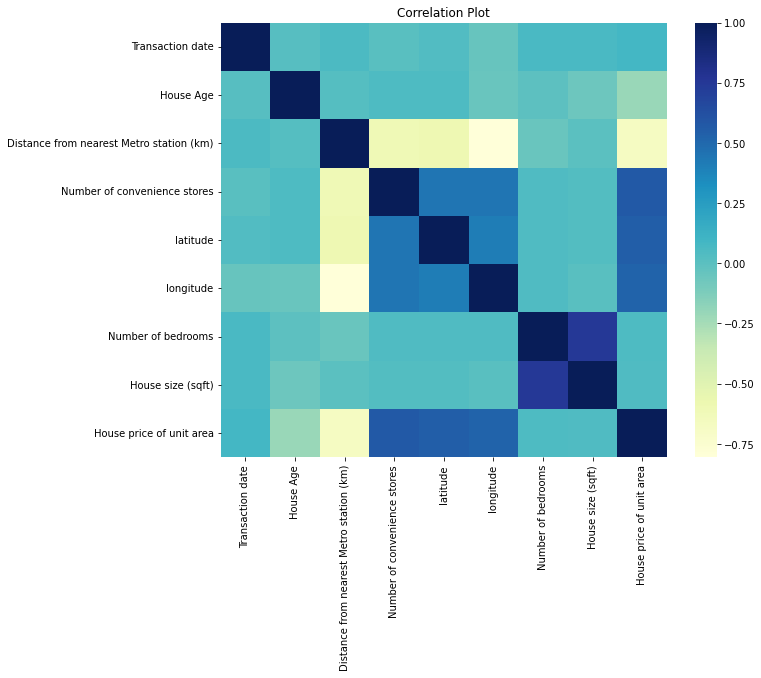

In [21]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.title("Correlation Plot")
sns.heatmap(df.corr(),cmap = "YlGnBu")

In [22]:
columns=["Transaction date"]
df.drop("Transaction date",axis=1,inplace=True)

splitting data 

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
#stacking model
def get_stacking():
    level0=list()
    level0.append(('knn',KNeighborsRegressor()))
    level0.append(('cart',DecisionTreeRegressor()))
    level0.append(('svm',SVR()))
    level1= LinearRegression()
    model= StackingRegressor(estimators= level0, final_estimator=level1)
    return model

In [26]:
#models we are going to create dictionary of models which  we are using 
def get_models():
    models= dict()
    models["Linnear Regression"]=LinearRegression()
    models['knn']= KNeighborsRegressor()
    models['cart']= DecisionTreeRegressor()
    models['svm']= SVR()
    models['stacking']=get_stacking()  
    return models

In [27]:
#evaluate model with validation data
def evaluate_model(model,X,y):
    cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores= cross_val_score(model,X,y,scoring='r2',cv=cv) #negative of mean absolute error
    return scores

In [28]:
models= get_models()
results, names= list(),list()
for name, model in models.items():
    scores= evaluate_model(model,x_train,y_train)
    results.append(scores)
    names.append(model)
    print(name,mean(scores))

Linnear Regression 1.0
knn 0.9935403478128768
cart 0.9965179614743142
svm -0.16514298858066825
stacking 0.9972982767779449


In [29]:
#boosting algorithm for regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
model=GradientBoostingRegressor()

In [31]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [32]:
n_scores=cross_val_score(model,x,y,scoring='r2',cv=cv)

In [33]:
print(mean(n_scores))

0.9991847843519385


we are getting best R2 score for linear regression.